In [4]:
import pandas as pd
import numpy as np
# import holoviews as hv
import constants
from utils import data_utils
from fitness import FitnessSum
from ga import GeneticAlgorithm, Crossover, Mutation, Selection
# hv.extension('bokeh')

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
def plotPopulation(data):
    x = []
    y = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            x.append(i)
            y.append(data.iloc[i,j])
    return hv.Scatter({'x' : x, 'y' : y})

In [385]:
df = data_utils.load_dataset('datasets/BD SITE SCC _ projeto UPE_unificada.xlsx')

In [14]:
pop_size = 50
ranking_size = 10
gene_set = list(range(df.shape[0]))
selection = Selection(0.5)
crossover = Crossover(kind=1)
mutation = Mutation(0.2)
optimizer = GeneticAlgorithm(gene_set, selection, crossover, mutation)
optimizer.initializePopulation(ranking_size, pop_size)
fitness_function = FitnessSum(1,1,1,constants.RELEVANCY_WEIGHTS, constants.VIABILITY_WEIGHTS, df)
def fitness_ind(X):
    F = fitness_function
    data = F.dataset.iloc[X]
    if len(data) == 0:
        return -np.inf
    relevancy = data.apply(F.R, axis=1).values
    viability = data.apply(F.V, axis=1).values
    return F.Cr*relevancy + F.Cv*viability

In [15]:
%%output size=170
buffer = hv.streams.Buffer(pd.DataFrame(columns=range(pop_size)))
hv.DynamicMap(plotPopulation, streams=[buffer])

:DynamicMap   []
   :Scatter   [x]   (y)

In [16]:
for i in range(100):
    optimizer.step(fitness_function)
    buffer.send(pd.DataFrame([[fitness_function(x) for x in optimizer.population]]))

In [12]:
from fitness import FuncaoRelevancia
from constants import RELEVANCY_WEIGHTS

In [13]:
R = FuncaoRelevancia(RELEVANCY_WEIGHTS)

In [24]:
def aaa(row):
    try:
        return R(row)
    except Exception as e:
        print(e)
        print(row)
        return 0

In [40]:
result = pd.DataFrame()

In [85]:
result.Relevancia.mean()

1.164831440853416

In [ ]:

def rank(dataset, V, R, G, som_attrs, rank_length, pop_size=30, generations_to_run=10):
    processedData = preprocessGA(dataset, R, V)
    print('rank size', rank_length)
    print(dataset.shape)
    ranking_progress = 0
    table_len = dataset.shape[0]
    gene_set = list(range(table_len))
    chr_size = rank_length

    selection = Selection(0.5)
    crossover = Crossover(kind=1)
    mutation = Mutation(0.5)
    optimizer = GeneticAlgorithm(gene_set, selection, crossover, mutation)
    optimizer.initializePopulation(chr_size, pop_size)

    fitness_function = FitnessSum(G, processedData)

    for i in tqdm(range(generations_to_run)):
        # print(i)
        optimizer.step(fitness_function)
        ranking_progress = i/generations_to_run
        # print(ranking_progress)
    # ranking_progress = 1
    # print(ranking_progress)

    population = optimizer.population
    fitnesses = [fitness_function(chr) for chr in population]
    print(fitnesses)
    best_index = np.argmax(fitnesses)
    best_chr = population[best_index]
    print(best_chr)
    ranking = dataset.iloc[best_chr]
    ranking['individual_fitness'] = processedData.individual_fitness.iloc[best_chr]
    print('sorting...')
    return ranking.sort_values('individual_fitness', ascending=False)



In [83]:
aaa = pd.DataFrame([['A'],['B'],['C']], index=[3,1,2])
aaa['bagulho'] = [3,1,2]
aaa

,0,bagulho
3,A,3
1,B,1
2,C,2


In [1]:
from clustering.som import run_som

Training map...
Map trained!
Map image created at program's directory!
Classification file succesfully created at program's directory!


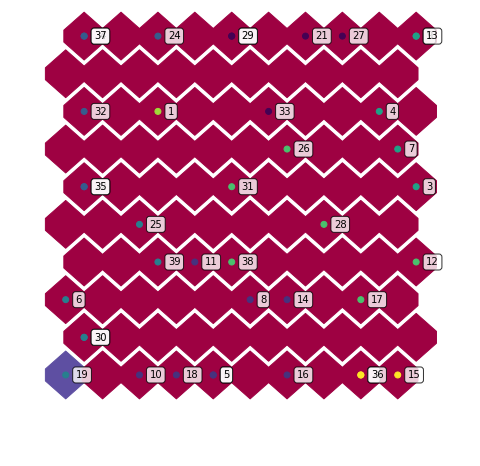

In [2]:
coord = run_som('datasets/colunas-normalizadas.csv', 10, 10)

In [6]:
import pandas as pd
df = pd.read_excel('datasets/BD SITE SCC _ projeto UPE_unificada.xlsx')

In [7]:
df.shape

(29660, 83)

In [11]:
from clustering.som import select_columns
df2 = select_columns('datasets/colunas-normalizadas.csv', 'all')

In [12]:
df2.shape

(42, 34)

In [53]:
[col for col in columns if col not in df]

[]

In [55]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [65]:
encdrAIS = OneHotEncoder(handle_unknown='ignore')

In [79]:
df = data_utils.load_dataset('datasets/BD SITE SCC _ projeto UPE_unificada.xlsx')

In [80]:
data = df.copy()

In [71]:
data is df

False

In [73]:
encdrAIS.fit_transform(df[['AIS']])

<2911x27 sparse matrix of type '<class 'numpy.float64'>'
	with 2911 stored elements in Compressed Sparse Row format>

In [81]:
data['AIS'] = 2

In [93]:
encdrAIS.fit_transform(df[['AIS']]).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [94]:
from sklearn.compose import ColumnTransformer

In [95]:
t = ColumnTransformer([
    ('cat', encdrAIS, ['AIS'])
])

In [103]:
from sklearn.preprocessing import KBinsDiscretizer

In [107]:
discretizer = KBinsDiscretizer(n_bins=10)

In [110]:
from datetime import datetime

In [162]:
datetime.strftime(datetime(2015, 10, 28, 0, 0, 0), '%Y-%m-%d %H:%M:%S')

'2015-10-28 00:00:00'

In [138]:
datetime.strptime('12/2015', 'MM/yyyy')

ValueError: time data '12/2015' does not match format 'MM/yyyy'

In [164]:
datetime.strptime('2015-10-28 00:00:00', '%Y-%m-%d %H:%M:%S')

datetime.datetime(2015, 10, 28, 0, 0)

In [168]:
import pandas as pd
import numpy as np

In [229]:
datetime(2,1,1).timestamp()

-62104052424.0

In [248]:
def handleDate(date_string):
    try:
        date = datetime.strptime(str(date_string), '%Y-%m-%d %H:%M:%S')
        return date.timestamp()
    except:
        return 0
aaa = df[date_features].iloc[96:111].applymap(handleDate)
kbd = KBinsDiscretizer(n_bins=100, encode='ordinal')
kbd.fit_transform(aaa)

In [254]:
df = data_utils.load_dataset('datasets/BD SITE SCC _ projeto UPE_unificada.xlsx')

In [265]:
columns = [
    'AIS',
    'IDADE',
    'BI CVLI',
    'BI CVP',
    'QUANTIDADE DE PROCESSOS NO TJPE',
    'PRONTUÁRIO SERES',
    'TOTAL DE VÍTIMAS-CONSUMADO',
    'STATUS CARCERÁRIO',
    'BI TENTATIVA-CVLI',
    'BI OUTROS',
    'BI NARCOTRÁFICO',
    'DATA DA PRISÃO ou REGISTRO NO CARCERÁRIO',
    'UNIDADE PRISIONAL ATUAL'
]

numeric_features = [
    'IDADE',
    'BI CVLI',
    'BI CVP',
    'QUANTIDADE DE PROCESSOS NO TJPE',
    'TOTAL DE VÍTIMAS-CONSUMADO',
    'BI TENTATIVA-CVLI',
    'BI OUTROS',
    'BI NARCOTRÁFICO'
]

categorical_features = [
    'AIS',
    'DATA DA PRISÃO ou REGISTRO NO CARCERÁRIO',
    'PRONTUÁRIO SERES',
    'STATUS CARCERÁRIO',
    'UNIDADE PRISIONAL ATUAL'
]


In [409]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

def handleFloat(number):
    try:
        return float(number)
    except:
        return np.NaN
data = pd.DataFrame()
data[numeric_features] = df[numeric_features].applymap(handleFloat)
data[categorical_features] = df[categorical_features].astype(str)
result = preprocessor.fit_transform(data).toarray()

In [416]:
from preprocessing import preprocessSOM

In [431]:
data = preprocessSOM(df, ['AIS', 'IDADE'])

In [432]:
from clustering.som import run_som

Training map...
Map trained!
Map image created at program's directory!
Classification file succesfully created at program's directory!


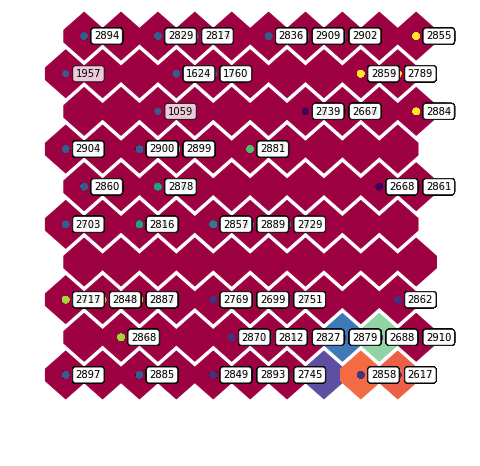

In [441]:
aaa = run_som(data, 10, 10)

In [446]:
import os

In [467]:
str(img_str)[2:-1][:10]

'iVBORw0KGg'

In [442]:
som = aaa[1]

In [444]:
som.clusters

array([[2, 2, 2, 2, 2, 2, 2, 2, 2, 7],
       [2, 2, 2, 2, 2, 0, 0, 2, 7, 7],
       [2, 2, 2, 2, 5, 0, 0, 0, 7, 7],
       [2, 2, 2, 5, 5, 5, 0, 0, 0, 7],
       [2, 2, 4, 5, 5, 5, 3, 0, 0, 0],
       [2, 4, 4, 4, 3, 3, 3, 0, 0, 0],
       [2, 4, 4, 4, 3, 3, 3, 1, 0, 1],
       [6, 6, 6, 6, 1, 1, 1, 1, 1, 1],
       [2, 6, 6, 6, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 1, 1, 1, 1, 1, 1, 1]])

In [443]:
som.bmus

array([[3, 3],
       [5, 9],
       [9, 8],
       ...,
       [6, 0],
       [6, 0],
       [9, 8]], dtype=int32)

In [440]:
import somoclu

def run_som(data, nrows, ncolumns, maptype="planar", gridtype="hexagonal", inicialization="pca"):
  
  labels = range(data.shape[0])

  n_rows, n_columns = nrows, ncolumns

  som = somoclu.Somoclu(n_columns, n_rows, maptype=maptype, gridtype=gridtype,
                        compactsupport=True, initialization=inicialization)
     
  """
  SOMOCLU: Classe para treino e visualização do SOM.

  """

  print("Training map...")
  som.train(data)
  print("Map trained!")

  """
  Treina o mapa usando os dados atuais no objeto Somoclu.

  """

  som.cluster()
  
  """ Classifica os neurônios, preenchendo a variável som.clusters, também seleciona
      as BMUs(neuônios que são exibidos no mapa) para cada entrada.
  """  
                        
  som.view_umatrix(bestmatches=True, labels=labels, filename='./mapa.png')
  print("Map image created at program's directory!")
  """
    Plota a U-Matrix do mapa treinado.
  """

  np.savetxt("./clusters.csv", som.clusters, delimiter=",")
  """ som.bmus possui as coordenadas das BMUs, que são as 
      células que conseguimos ver no mapa.
      
      som.clusters(arquivo cluster.csv) é o resultado do método som.cluster() e 
      possui a classificação de cada neurônio do mapa(ao total: (n_row * n_columns) 
      neurônios).
      
      Como a localização dos neurônios após o treinamento é fixa no mapa, através 
      das coordenadas das BMUs em som.bmus, é possível extrair as suas respectivas 
      classificações em som.clusters apenas em função de suas coordenadas.
      """

  clusters = pd.read_csv('./clusters.csv')
  id_classes = np.empty((len(data),2), dtype=int)
  id_class = pd.DataFrame()
  """ id_classes: array utilizado para armazenar as classes resultantes da cluesterização,
      será usado para salvar o arquivo classes.csv no formato:
          ID CLASSE 
          ..   ..
          ..   ..
          ..   ..
          ..   ..
  """
  i=-1
  for linha, coluna in som.bmus:
      i=i+1
      id_classes[i][0] = labels[i]                      #id
      id_classes[i][1] = som.clusters[linha][coluna]    #classe

  output = pd.DataFrame(id_classes, columns=['ID', 'Classe'])
  output.to_csv('./classes.csv', sep=',', index=False)
  print("Classification file succesfully created at program's directory!")

  f= open("./bmus.txt","w+")
  """escreve as coordenadas de cada bmu para arquivo "bmus.txt"""
  coordinates = []
  i=1
  j=0
  for x,y in som.bmus:
      print(("ID %d: (%d, %d)\n" % (i, x, y)), file=f)
      coordinates.append({'Id': i, 'x':x, 'y':y})
      i=i+1

        
  return coordinates, som

In [435]:
pd.DataFrame(aaa)

,Id,x,y
0,1,3,3
1,2,5,9
2,3,9,8
3,4,2,3
4,5,2,0
5,6,2,7
6,7,0,9
7,8,0,9
8,9,2,5
9,10,6,0
